In [1]:
import sys
sys.path.append('../../')

import cPickle
import h5py

def getHDF5Data(f):
    ff = h5py.File(f,mode='r')
    alldata = {}
    for k in ff.keys():
        alldata[k] = ff[k].value
    return alldata
def getPKLData(f):
    with open(f,'rb') as f:
        data = cPickle.load(f)
    return data

In [11]:
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../../..')
from tsne_python.tsne import tsne

def plotForExperiment(final_stats):
    def plot(name, bounds):
        plt.plot(*zip(*bounds), label=name)

    for key in final_stats:
        plot(key, final_stats[key])

    plt.xlabel('epochs')
    plt.ylabel('Variational Lower Bound')
    plt.legend()
    plt.show()
    plt.close()

def plotFinalInfer(infer, model_name, settings='mu'):
    mean = infer['eval_%s_q' % settings]
    X = mean.reshape(mean.shape[0]*mean.shape[1], mean.shape[2])
    
    Y = X if X.shape[1] == 2 else tsne(X, quiet=True) # Already hidden states is 2 dims. No need to do tsne!

    plotFigure(Y, title='z (%d dims) for mouse in %s tissue'%(X.shape[1], model_name))
    
def plotFigure(Y, title, xlabel='axis 1', ylabel='axis 2'):
    assert Y.shape[0] == 60
    
    for sample in xrange(Y.shape[0]/10):
        label = np.array(range(1, 6), dtype=int)
        plt.scatter(Y[5*sample:5*(sample+1), 0], 
                    Y[5*sample:5*(sample+1), 1], s=20, c=label, cmap='Blues');
    for sample in xrange(Y.shape[0]/10, Y.shape[0]/5):
        label = np.array(range(1, 6), dtype=int)
        plt.scatter(Y[5*sample : 5*(sample+1), 0], 
                    Y[5*sample : 5*(sample+1), 1], s=20, c=label, cmap='Reds');
    plt.colorbar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


In [12]:
expt = 'H-gender'
uid = 'DKF_lr-8_0000e-04-vm-R-inf-structured-dh-10-ds-10-nl-relu-bs-256-ep-3000-rs-20-ar-1_0000e+01-rv-5_0000e-02-uid'
final_stats_file = '../../expt-mouse-puberty/chkpt-%s/%s-final-stats.h5' % (expt, uid)
final_infer_file = '../../expt-mouse-puberty/chkpt-%s/%s-final-infer.h5' % (expt, uid)

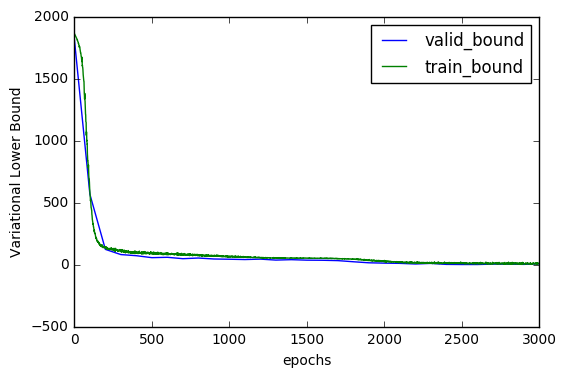

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  60 ...
Mean value of sigma:  0.340437806532


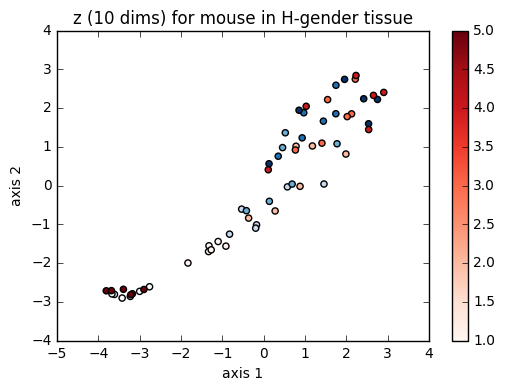

In [13]:
final_stats = getHDF5Data(final_stats_file)
plotForExperiment(final_stats)

final_infer = getHDF5Data(final_infer_file)
plotFinalInfer(final_infer, expt)

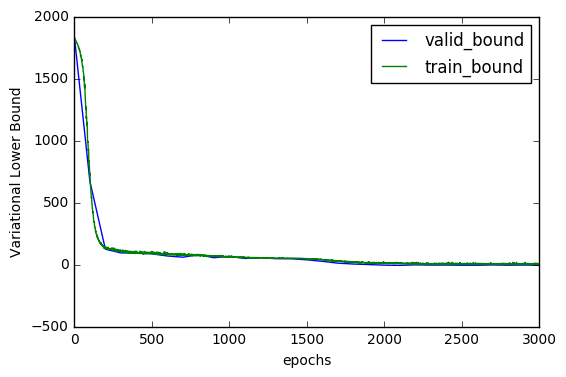

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  60 ...
Mean value of sigma:  0.332477779604


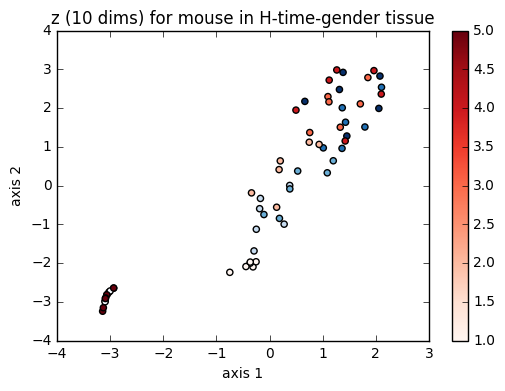

In [16]:
expt = 'H-time-gender'
uid = 'DKF_lr-8_0000e-04-vm-R-inf-structured-dh-10-ds-10-nl-relu-bs-256-ep-3000-rs-20-ar-1_0000e+01-rv-5_0000e-02-uid'
final_stats_file = '../../expt-mouse-puberty/chkpt-%s/%s-final-stats.h5' % (expt, uid)
final_infer_file = '../../expt-mouse-puberty/chkpt-%s/%s-final-infer.h5' % (expt, uid)

final_stats = getHDF5Data(final_stats_file)
plotForExperiment(final_stats)

final_infer = getHDF5Data(final_infer_file)
plotFinalInfer(final_infer, expt)

hidden_num: 2


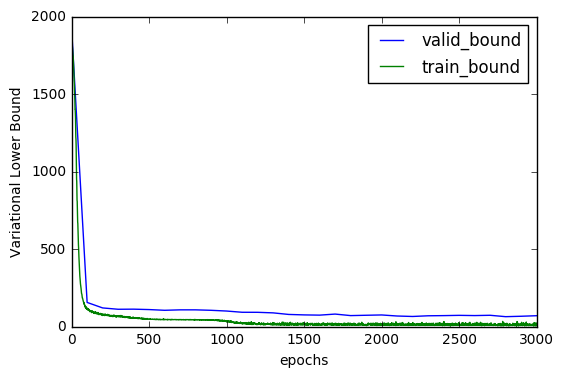

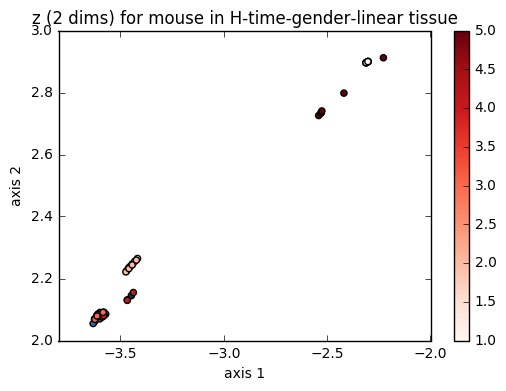

hidden_num: 5


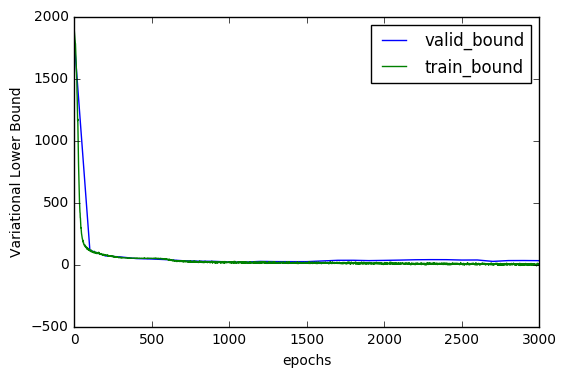

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  60 ...
Mean value of sigma:  0.967752164456


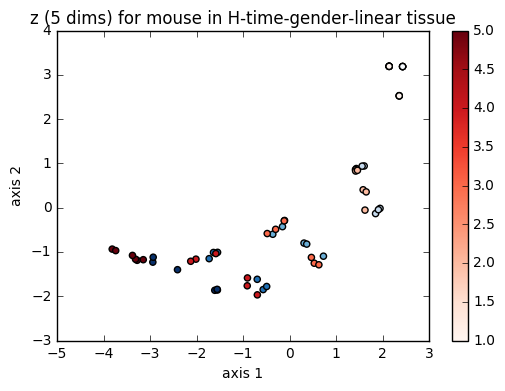

hidden_num: 10


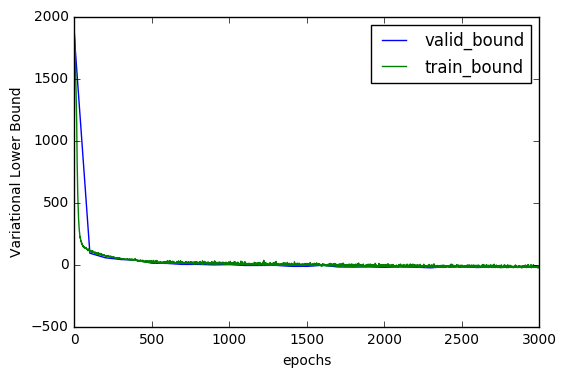

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  60 ...
Mean value of sigma:  1.73372727033


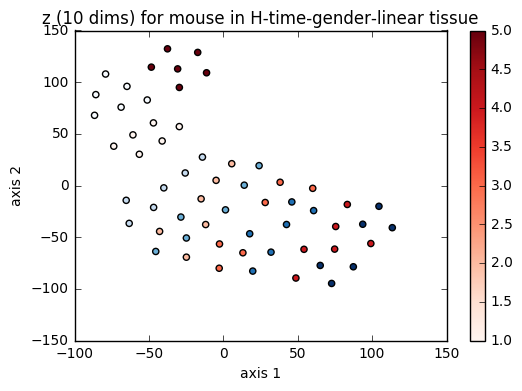

hidden_num: 20


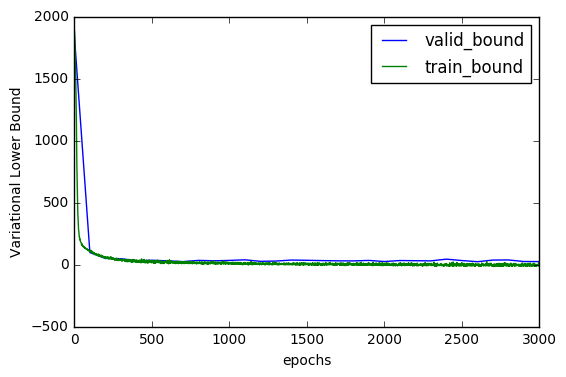

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  60 ...
Mean value of sigma:  1.9010461092


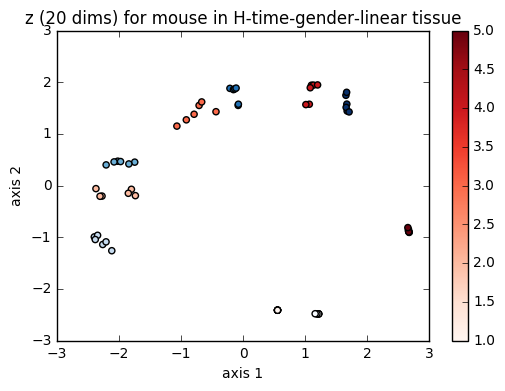

In [21]:
for hidden_num in [2, 5, 10, 20]:
    print 'hidden_num:', hidden_num
    expt = 'H-time-gender-linear'
    uid = 'DKF_lr-5_0000e-03-vm-R-inf-structured-dh-10-ds-{}-nl-relu-bs-256-ep-3000-rs-20-ar-1_0000e+01-rv-0-uid'.format(hidden_num)
    final_stats_file = '../../expt-mouse-puberty/chkpt-%s/%s-final-stats.h5' % (expt, uid)
    final_infer_file = '../../expt-mouse-puberty/chkpt-%s/%s-final-infer.h5' % (expt, uid)

    final_stats = getHDF5Data(final_stats_file)
    plotForExperiment(final_stats)

    final_infer = getHDF5Data(final_infer_file)
    plotFinalInfer(final_infer, expt)